# Stack Academy - Data Science do Zero

# Módulo 09 - Machine Learning

## KNN - N Nearest Neighbors

# 9.5 - K Nearest Neighboors (KNN) - Aplicando o Algoritmo nos Dados do Dataset Iris

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Carregando a base de dados

In [3]:
iris = pd.read_csv(r"Módulo 09 - Machine Learning\material_apoio\KNN\iris.csv")

### Verificando os atributos

In [4]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


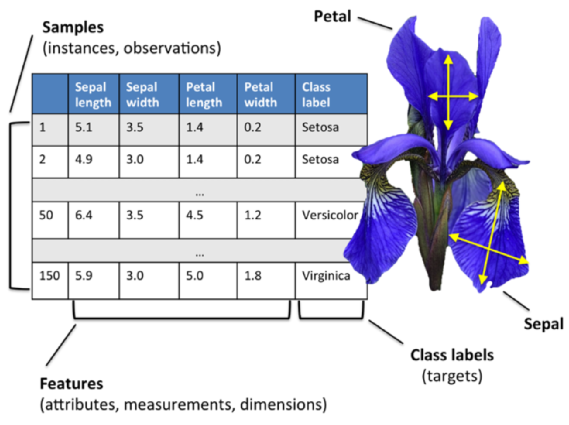

In [5]:
from IPython.display import Image
Image(filename =r"Módulo 09 - Machine Learning\material_apoio\KNN\iris-data-set.png", width=500, height=500)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Dividindo os dados em treino e teste

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop('Species',axis=1),iris['Species'],test_size=0.3)

# Passando os dados sem o valor de classe (drop 'species')
# train_test_split(iris.drop('Species',axis=1)

# 70% será usado para treino: X_train (4 atributos) e y_train (classe species)

# 30% será usado para teste: X_test (4 atributos) e y_test (classe species)

### Verificando a forma dos dados

In [9]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [10]:
y_train.shape,y_test.shape

((105,), (45,))

### Instânciando o algoritmo KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# n_neighbors=3: Parâmetro K

### Treinando o algoritmo 

In [12]:
knn.fit(X_train,y_train)

# fit(): Treina o algoritmo com os dados passados como parâmetro

KNeighborsClassifier(n_neighbors=3)

### Executando o KNN com o conjunto de teste

In [13]:
resultado = knn.predict(X_test)
resultado

# predict(): Padrão para receber os dados de teste para fazer a predição

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'],
      dtype=object)

### Executando Teste com Novos Dados

In [14]:
test = np.array([[5.1,3.5,1.4,0.2]])
knn.predict(test),knn.predict_proba(test)

# predict_proba(): Retorna a probabilidade do teste para a respectiva classe

(array(['Iris-setosa'], dtype=object), array([[1., 0., 0.]]))

## Técnicas de Validação

### Matriz de Confusão

In [15]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['          Predição'], margins=True))

# Método crosstab da biblioteca pandas.
# Classes de teste (y_test) e o resultado para fazer a comparação
# rownames e colnames: Nome de linhas e colunas
# margins: Ver margem

# Resultado:
# O algoritmo confundiu apenas uma Iris-versicolor com a Iris-virginica

          Predição  Iris-setosa  Iris-versicolor  Iris-virginica  All
Real                                                                 
Iris-setosa                  13                0               0   13
Iris-versicolor               0               18               0   18
Iris-virginica                0                1              13   14
All                          13               19              13   45


### Metricas de classificação

In [16]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado,target_names=iris['Species'].unique()))

# Método classification_report da biblioteca sklearn.

# Classe teste y_test e o resultado do algoritmo.
# target_names=iris['Species']: Nome do atributo

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



# 9.6 - K Nearest Neighboors (KNN) - Utilizando o KNN para Identificar Dígitos escritos a Mão

### Carregando a base de dados - Dígitos

In [17]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

# The digits dataset (da Biblioteca sklearn)
digits = datasets.load_digits()

### Descrição sobre a base de dados

In [18]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Visualizando os valores de dados

In [19]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

### Visualizando os valores de classes

In [20]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Visualizando as imagens e classes

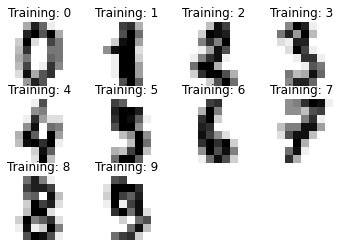

In [21]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

### Convertendo os dados em Dataframe

In [22]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
classe = digits.target

In [23]:
dataset = pd.DataFrame(data)
dataset['classe'] = classe

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [25]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Dividindo os dados em treino e teste

In [26]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('classe',axis=1),dataset['classe'],test_size=0.3)

### Verificando a forma dos dados

In [27]:
X_train.shape,X_test.shape

((1257, 64), (540, 64))

In [28]:
y_train.shape,y_test.shape

((1257,), (540,))

### Instânciando o algoritmo KNN

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)

# n_neighbors=3: K=3
# p=2 e metric=minkowski: equivale a distância euclidiana

### Treinando o algoritmo 

In [30]:
knn.fit(X_train,y_train)

# Método FIT recebe os dados de treino e as classes de treino

KNeighborsClassifier(n_neighbors=3)

### Predizendo novos pontos 

In [31]:
# Predição usando os dados de teste
resultado = knn.predict(X_test)

## Técnicas de Validação

### Metricas de classificação

In [32]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        61
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        53
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        48
           8       0.98      1.00      0.99        56
           9       1.00      0.98      0.99        49

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



### Matriz de Confusão

In [33]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['          Predito'], margins=True))

          Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                          
0                  58   0   0   0   0   0   0   0   0   0   58
1                   0  54   0   0   0   0   0   0   0   0   54
2                   0   0  55   0   0   0   0   0   0   0   55
3                   0   0   0  61   0   0   0   0   0   0   61
4                   0   0   0   0  48   0   0   0   0   0   48
5                   0   0   0   0   0  53   0   0   0   0   53
6                   0   0   0   0   0   0  58   0   0   0   58
7                   0   0   0   0   0   0   0  48   0   0   48
8                   0   0   0   0   0   0   0   0  56   0   56
9                   0   0   0   0   0   0   0   0   1  48   49
All                58  54  55  61  48  53  58  48  57  48  540


### Cross Validation

In [34]:
# Validação Cruzada: Separa os blocos de treino e teste de forma iterativa.

# Um bloco de dados e separado para treino e outro para teste em uma iteração.
# Logo em seguida, reamostra os dados e executa novamente.
# Assim sucessivamente ...
# Garantimos que não terá variancia, pois não estamos estabelecendo os daods de treino e teste de forma estática.

# CV=5 o algoritmo fará 5 iterações (CV = validação cruzadas)
# O resultado é a precisão para cada uma das 5 iterações.

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, dataset.drop('classe',axis=1),dataset['classe'], cv=5)
scores

array([0.95555556, 0.95833333, 0.96657382, 0.98607242, 0.96657382])

# 9.7 - Otimizando o Parametro K para Garantir o Melhor Desempenho

## Otimizando o Parametro K

- Precisamos fazer testes para otimizar o melhor valor para o parâmetro K.
- É necessário aplicar ferramentas e técnicas para otimizar os mehores parâmetros para o algoritmo.

### Importando o GridSearch

In [35]:
from sklearn.model_selection import GridSearchCV

### Definindo a lista de valores para o parametro 

In [36]:
k_list = list(range(1,31))

In [37]:
k_values = dict(n_neighbors=k_list)
k_values

# Será especificado uma lista de 1 a 30 para valroes de K.
# Assim, avaliaremos o melhor valor de K.

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

### Instânciando o objeto GridSearch

In [38]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

# scoring='accuracy': Resultado será a acurácia

### Treinando o objeto

In [39]:
grid.fit(dataset.drop('classe',axis=1),dataset['classe'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

### Visualizando os valores de scores

In [42]:
grid.cv_results_

{'mean_fit_time': array([0.00518723, 0.00418873, 0.00518703, 0.00498619, 0.00538526,
        0.00438848, 0.00418882, 0.00398955, 0.00478778, 0.00438805,
        0.00438724, 0.00558577, 0.00538568, 0.00538783, 0.00618782,
        0.00418911, 0.00418906, 0.00418987, 0.00418987, 0.00498686,
        0.00599208, 0.00418916, 0.00678263, 0.00597768, 0.00718193,
        0.00558538, 0.00618038, 0.006183  , 0.00478802, 0.00478444]),
 'std_fit_time': array([0.00097758, 0.0003989 , 0.00074598, 0.0006306 , 0.00135248,
        0.00079803, 0.00039921, 0.00063113, 0.00039904, 0.00048953,
        0.00101849, 0.0004886 , 0.00079767, 0.0013578 , 0.00159167,
        0.00074658, 0.00039885, 0.00039952, 0.00074727, 0.00199456,
        0.00208763, 0.00074676, 0.00193446, 0.0019914 , 0.00132281,
        0.00162052, 0.00171473, 0.00193405, 0.00074714, 0.00074557]),
 'mean_score_time': array([0.04388089, 0.04288831, 0.04348249, 0.04168925, 0.05166173,
        0.04009218, 0.0398931 , 0.03949394, 0.04089003, 0.04

In [43]:
print("Melhor valor de k = {} com o valor {} de acurácia".format(grid.best_params_,grid.best_score_))

Melhor valor de k = {'n_neighbors': 2} com o valor 0.9671711544413494 de acurácia


### Visualização dos valores de K e acurácia

In [ ]:
scores=[]
for score in grid.cv_results_:
    scores.append(score[1])

plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

## Regressão Linear

# 9.12 - Regressão Linear - Aula Prática Representação Linear

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' # gráficos com maior qualidade

## Leitura dos dados

In [86]:
X = np.array([0,1,2,3])
y = np.array([0,1,2,3])

## Representando uma Reta

In [87]:
def predict(alpha, beta, X):
    return alpha*X + beta

Text(0, 2.9, 'Alpha=1 e Beta=0')

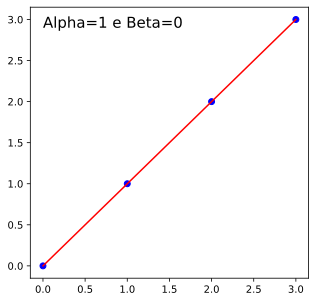

In [88]:
alpha = 1 #inclinação
beta = 0

ỹ = predict(alpha=alpha, beta=beta, X=X)

fig, ax = plt.subplots(figsize=(5,5))

# Plot pontos
ax.scatter(X,y, c='b') #c='b': Cor blue

# Plot Reta
plt.plot(X, ỹ, 'r')

plt.text(0,2.90,'Alpha={} e Beta={}'.format(alpha, beta), fontdict={'size': 15})

## Escolhendo o melhor alpha e beta

In [89]:
tamanho = len(X)
X_b = np.c_[np.ones((tamanho, 1)), X]  # add x0 = 1 to each instance
X_b

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.]])

In [90]:
X_b

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.]])

In [91]:
# Métodos dos mínimos quadrados
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

# Beta = 0 (4.44 elevado a -16)
# Alpha = 1

array([4.4408921e-16, 1.0000000e+00])

In [92]:
alpha = theta_best[1] #inclinação
beta = theta_best[0]

In [93]:
ỹ = predict(alpha=alpha, beta=beta, X=X)

Text(0, 2.9, 'Alpha=1.0 e Beta=0.0')

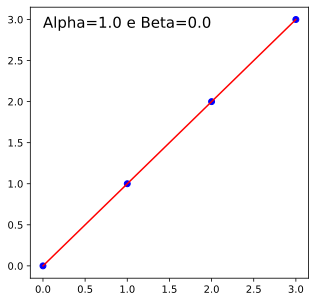

In [94]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')
plt.text(0,2.90,'Alpha={} e Beta={}'.format(round(alpha,3), round(beta,3)), fontdict={'size': 15})

# 9.15 - Avaliando Modelos de Regressão

In [95]:
from sklearn import metrics
import numpy as np

## Leitura dos dados

In [96]:
y_test = np.array([1,2,3,4])
ỹ = np.array([1,2,3,6])

### 1. MAE

- Calcula o erro absoluto médio entre valores preditos e reais
- Interpretação mais intuitiva
- Não pune severamente os outliers do modelo
- Medida não ideal para lidar com problemas delicados 

In [97]:
print('MAE:', metrics.mean_absolute_error(y_test, ỹ))

MAE: 0.5


### 2. MSE
- Calcula o erro das previsões ao quadrado
- Valores muitos distantes do real, aumenta o valor da medida muito facilmente
- Dificuldade para interpretação direta

In [98]:
print('MSE:', metrics.mean_squared_error(y_test, ỹ))

MSE: 1.0


### 3. RMSE
- Calcula a raiz do erro média quadrático:
- Interpretabilidade melhorada em relação ao MSE 
- Penaliza predições muito distante do real

In [99]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ỹ)))

RMSE: 1.0


### 4. MAPE
- Calcula um erro absoluto em porcentagem
- Intuitiva para a interpretação do programador 
- Pode ser ruim quando o problema possui um grande alcance de número onde a variável predita varia de 0 a 20000, por exemplo.

In [100]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [101]:
mean_absolute_percentage_error(y_test, ỹ)

12.5

### 4. R Quadrado
- Mede o quão próximo as medidas reais estão do nosso modelo
- Se aplica apenas a modelo univariados (X == 1)
- Pode ser enviado por que utilizamos a correlação dos dados
- Muito utilizada na área de financias

In [102]:
print('R:', metrics.r2_score(y_test,ỹ))

R: 0.19999999999999996


### 5. R Quadrado ajustado
- Representa a porcentagem da variância  sem viés devido ao acréscimo de novas features:
- Avalia modelos com mais precisão e segurança
- Pode ser utilizada em modelos com mais de uma feature (X > 1)
- Usado para modelos mais simples que considera os valores encontrados pelo modelo a soma de um erro residual.

In [103]:
def adjusted_R(y, ỹ, N):
    adj_r = (1 - ((1 - metrics.r2_score(y, ỹ)) * (len(y) - 1)) / (len(y) - N - 1))   
    return adj_r
print('R-adjust:', adjusted_R(y_test, ỹ, 1))

R-adjust: -0.20000000000000018


# 9.14 - Regressão Linear - Modelo para Apartamentos

## Aula de Regressão linear

In [104]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## Leitura dos dados
- X representa os M³ do apartamento que possuem uma variação de 40m³ até 120 m³
- y é o preço do apartamento

In [105]:
X = np.random.randint(low=40,high=120, size=(20,1))
y = (3 * X + np.random.randint(low=100,high=150, size=(20,1))) * 1000

Text(0, 0.5, 'Preço')

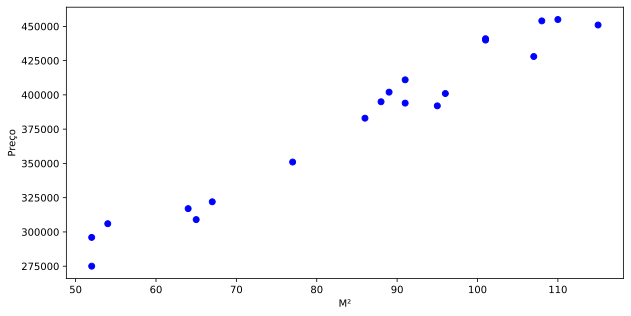

In [106]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X,y, c='b')
plt.xlabel("M²")
plt.ylabel("Preço")

## Representando uma Reta

In [107]:
def predict(alpha, beta, X):
    return alpha*X + beta

## Escolhendo melhor alpha e beta

In [108]:
# add x0 = 1 to each instance
# Para fazer a multiplicação de matrizes

tamanho = len(X)
X_b = np.c_[np.ones((tamanho, 1)), X]  
X_b

array([[  1.,  95.],
       [  1.,  65.],
       [  1., 115.],
       [  1., 101.],
       [  1.,  86.],
       [  1.,  54.],
       [  1., 110.],
       [  1.,  67.],
       [  1.,  96.],
       [  1.,  89.],
       [  1.,  91.],
       [  1.,  88.],
       [  1., 107.],
       [  1.,  77.],
       [  1.,  91.],
       [  1.,  52.],
       [  1., 108.],
       [  1., 101.],
       [  1.,  52.],
       [  1.,  64.]])

In [109]:
X_b.T.dot(X_b)

array([[2.00000e+01, 1.70900e+03],
       [1.70900e+03, 1.53767e+05]])

In [110]:
# Métodos dos mínimos quadrados
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

# .dot(): Função para fazer a multiplicação de matrizes

array([[138095.50042351],
       [  2844.40608047]])

## Ajustando a reta

In [111]:
alpha = theta_best[1] # inclinação
beta = theta_best[0]

In [112]:
ỹ = predict(alpha=alpha, beta=beta, X=X)

In [113]:
ỹ

array([[408314.07806853],
       [322981.89565431],
       [465202.199678  ],
       [425380.51455137],
       [382714.42334426],
       [291693.4287691 ],
       [450980.16927563],
       [328670.70781526],
       [411158.484149  ],
       [391247.64158568],
       [396936.45374663],
       [388403.23550521],
       [442446.95103421],
       [357114.76862   ],
       [396936.45374663],
       [286004.61660815],
       [445291.35711468],
       [425380.51455137],
       [286004.61660815],
       [320137.48957384]])

## Plotando os Dados

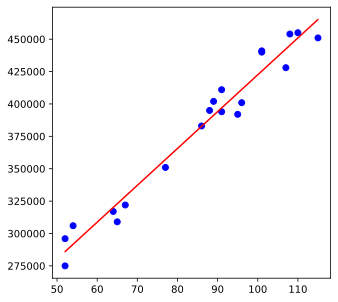

In [114]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

## Como implementar uma regressão linear usando o Scikit-learn?

In [115]:
from sklearn.linear_model import LinearRegression

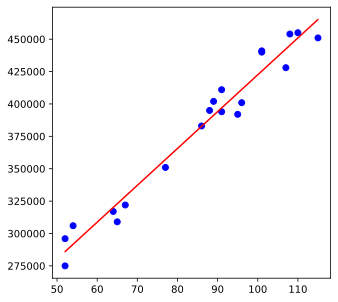

In [116]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

In [117]:
# Instanciando o modelo
lr = LinearRegression()

In [118]:
lr.fit(X, y)

# fit(): Treina o algoritmo com os dados passados como parâmetro

LinearRegression()

In [119]:
ỹ = lr.predict(X)

# predict(): Padrão para receber os dados de teste para fazer a predição

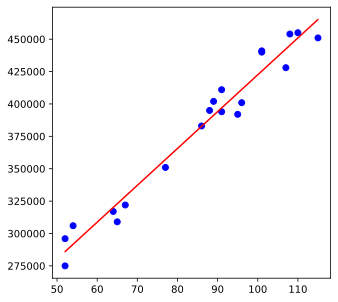

In [120]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

In [121]:
print("Training score: {:.2f}".format(lr.score(X, y)))

Training score: 0.96


## Avaliando meu modelo de regressão

In [122]:
from sklearn import metrics

In [123]:
# Avaliando os erros:
#MSE: Escala difícil de interpretar

print('MAE:', metrics.mean_absolute_error(y, ỹ))
print('MSE:', metrics.mean_squared_error(y, ỹ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, ỹ)))

MAE: 9896.764494791769
MSE: 120399469.80130489
RMSE: 10972.669219533818


# 9.18 - Regressão Linear -  Projeto Ecomerce

### Projeto de Machine Learning - Regressão Linear 

- Você começou a trabalha em uma **empresa de comércio eletrônico**, como um cientista de dados, na cidade de Nova York. A empresa **vende roupas onlines** e também **fornece serviços** de consultoria em estilo e vestuário.

- Clientes procuram na loja sessões/reuniões com um estilista pessoal e podem decidir encomendar roupas que eles desejam usando um aplicativo móvel ou um site;

- A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em **aplicativos móveis ou em seu site**. Não existe recurso para os investimentos, você foi contratado para ajudá-los a descobrir isso! Vamos começar!

In [124]:
### Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Etapas do projeto
- Coleta de dados
- Análise de dados
- Criação de modelos
- Validação de modelos
- Apresentação dos resultados

# 9.19 - Projeto - Coleta de Dados

### 1. Coleta de dados

Empresa de forneceu um arquivo com seus dados:

Arquivo: https://www.kaggle.com/srolka/ecommerce-customers
- Informações pessoais do cliente:
    - **Nome**
    - **Email**
    - **Avatar**
- Informações sobre a interação do cliente com a loja 
    - **Avg. Session Length**: Tempo médio das sessões de consultoria de estilo na loja.
    - **Time on App**: Tempo médio gasto no app em minutos.
    - **Time on Website**: Tempo médio gasto no site em minutos.
    - **Lenght of Membership**: Há quantos anos o cliente é membro.
    - **Yearly Amount Spent**: Valor gasto anualmente

In [125]:
## Leitura dos dados
clientes = pd.read_csv(r'Módulo 09 - Machine Learning\material_apoio\reg-linear\Ecommerce Customers.csv')

In [126]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [127]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [128]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# 9.20 - Projeto - Análise Exploratória Pandas Profiling

## 2. Análise de dados exploratória

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
relatorio = ProfileReport(clientes, title='Relatorio Clientes do Ecommerce')
relatorio.to_file('relatorio_ecommerce.html')

In [ ]:
relatorio

### Insights 
- Pessoas que passam necessariamente mais tempo no site não gastam mais!  
- Pessoas que **gastam mais tempo no app** tem uma tendência para **gastar mais**!
- Pessoas que são clientes a algum tempo NÃO gastam mais.
- Pessoas que tem **maior tempo de membro** tem uma tendência a gastar mais.

# 9.21 - Projeto - Análise Exploratoria Seaborn

- Qual a relação do cara que passa mais tempo no site em relação ao valor gasto anual?

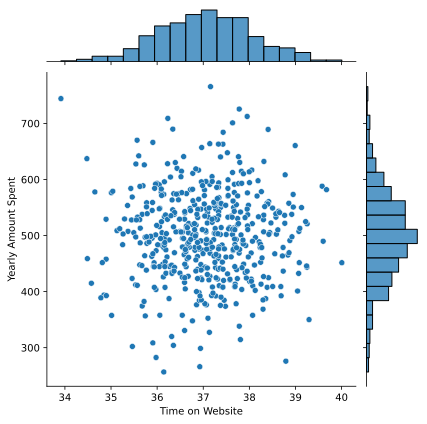

In [133]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes)

- Qual a relação do cara que passa mais tempo no APP em relação ao valor gasto anual?  

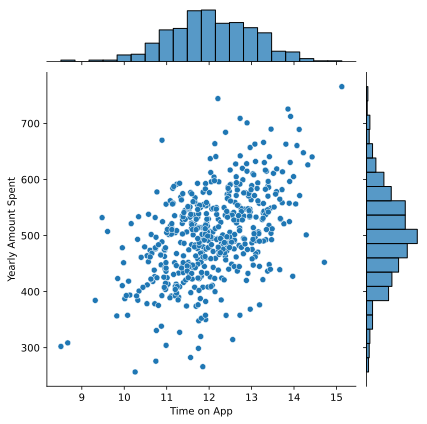

In [134]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

- As pessoas que usam o aplicativo elas são clientes a mais tempo ou não?

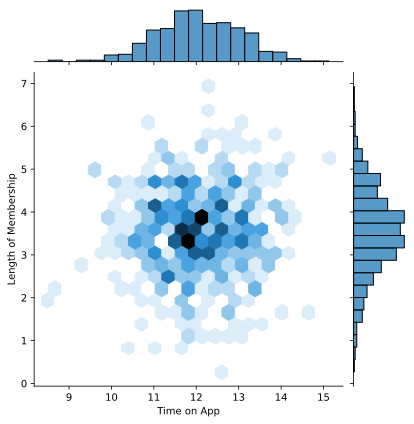

In [135]:
sns.jointplot(x='Time on App', y='Length of Membership', data=clientes, kind='hex')

- Quais variáveis conseguimos explicar ou que tem maior impacto no quanto uma pessoa gasta no ano?

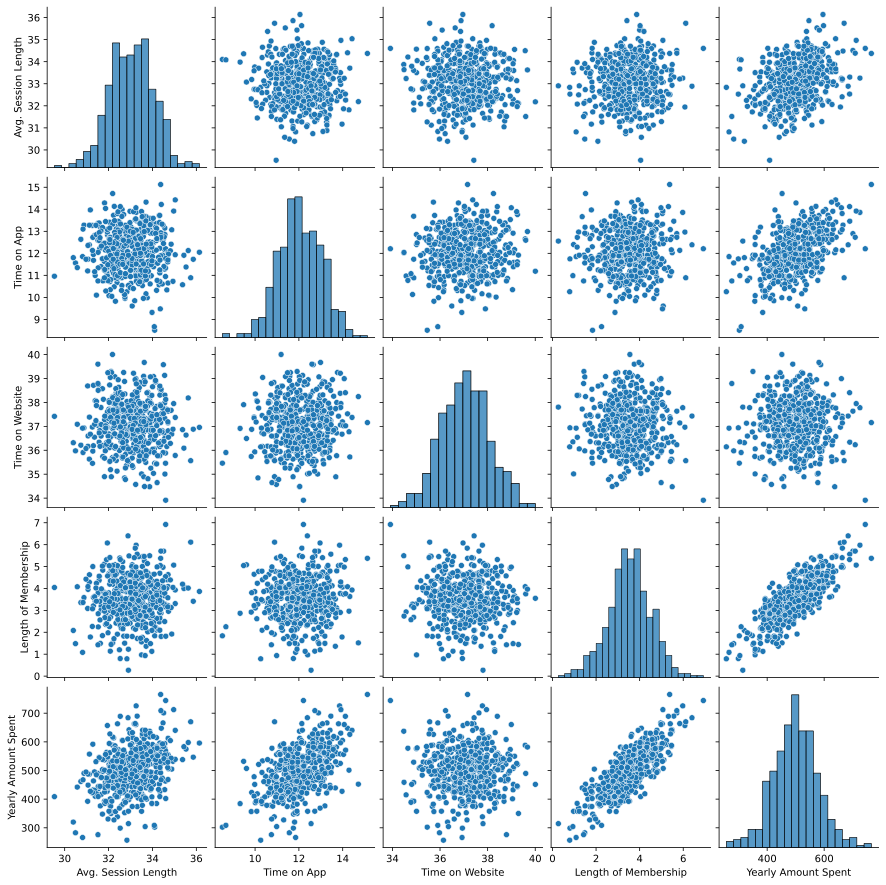

In [136]:
sns.pairplot(clientes)

- Como ficaria um modelo linear usando o Tempo de App em relação ao valor gasto?

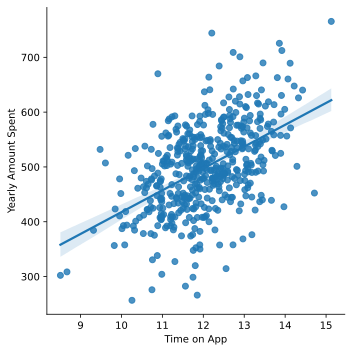

In [137]:
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

- Como ficaria um modelo linear usando o Tempo de Membro em relação ao valor gasto?

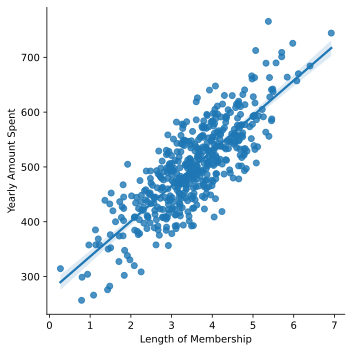

In [138]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=clientes)

# 9.22 - Projeto - Criando um Modelo de Regressão

## 3. Criação de um Modelo com todas as variáveis

- Separa quem é meu X e meu y

In [139]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [140]:
y = clientes['Yearly Amount Spent']

In [141]:
X = clientes[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

- Dividir meu conjunto em treino e teste usando sckit learning

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [144]:
y_train.shape

(350,)

In [145]:
y_test.shape

(150,)

- Criar um modelo de regressão linear usando sklearn

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
# Instanciando o Modelo
lm = LinearRegression()

- Utilizar o método fit() para treinamendo do meu modelo

In [148]:
lm.fit(X_train, y_train)

LinearRegression()

- Apresentando os coeficientes para cada variável do meu X

In [149]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

- Para validar o modelo no conjunto de teste, você precisa utilizar o método predict()

In [150]:
ỹ = lm.predict(X_test)

In [151]:
ỹ

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

** Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos. **

Text(0, 0.5, 'ỹ predito')

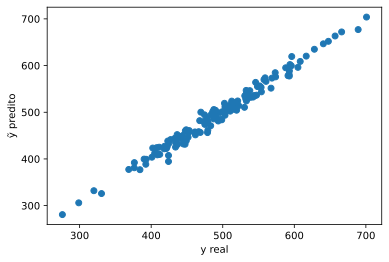

In [152]:
plt.scatter(y_test, ỹ)
plt.xlabel('y real')
plt.ylabel('ỹ predito')

# 9.23 - Projeto - Avaliando o Modelo Regressão Linear

## 4. Avaliando o Modelo
layouts: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html

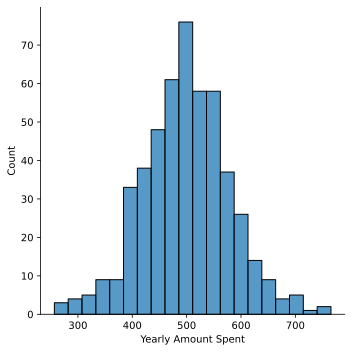

In [153]:
sns.displot(clientes, x="Yearly Amount Spent")
plt.tight_layout()

In [154]:
from sklearn import metrics

In [155]:
print('MAE:', metrics.mean_absolute_error(y_test, ỹ))
print('MSE:', metrics.mean_squared_error(y_test, ỹ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ỹ)))
print('R:', metrics.r2_score(y_test,ỹ))

MAE: 8.426091641432052
MSE: 103.91554136503235
RMSE: 10.193897260863107
R: 0.9808757641125857


In [156]:
def adjusted_R(y, ỹ, N):
    adj_r = (1 - ((1 - metrics.r2_score(y, ỹ)) * (len(y) - 1)) / (len(y) - N - 1))   
    return adj_r

In [157]:
print('R-adjust:', adjusted_R(y_test, ỹ, X_train.shape[1]))

R-adjust: 0.9803481989846571


**Análises:**
- MAE: Erro de 8.42, erro pequeno, baixo. Muito bom.
- MSE: Erro em escala. 103 o valor está adequado.
- RMSE: Pela raiz quadrada suaviza o erro.
- R: 0.98 está muito bom em relação a variância.
- R Ajustado: Foi praticamente igual ao R.
    
As variáveis analisadas são muito correlacionadas com o valor gasto anualmente.

# 9.24 - Projeto - Conclusões

## Conclusões

- O modelo linear resolveu o problema?

In [158]:
absolute_error = y_test-ỹ

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

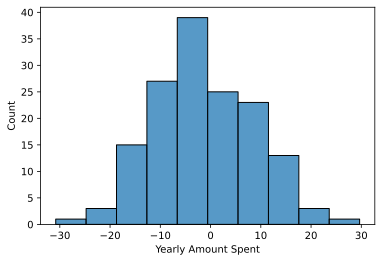

In [159]:
sns.histplot(absolute_error, bins=10)

# Erro muito bom, pequena variação.
# Foi proposto um modelo de regressão linear para estimar a receita da empresa com dados do próprio banco de dados da empresa.

- Q1) Qual a variável mais importante do meu modelo? 
- Q2) É melhor eu investir no site ou no aplicativo?

In [160]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


**Conclusões Finais:**
- A cada aumento em uma unidade no tempo médio das sessões de consultoria com o estilista, temos um aumento de 25.72 dólares gasto no ano;
- A cada minuto gasto em média no aplicativo, aumentamos a receita anual em 38.59 dólares;
- O tempo no site reflete muito pouco na receita anual
- A empresa ganha mais quando fideliza seu cliente, quanto mais tempo em unidade de fidelização maior a receita anual em 61.67 dólares

# 9.28 - Como Avaliar Classificação na Prática

### Avaliando modelos de Classificação

In [161]:
from sklearn import metrics
import numpy as np
import random

## Leitura dos dados

In [162]:
y_test = random.choices([0,1], k=50)
ỹ_test = random.choices([0,1], k=50)

In [163]:
y_test[:5]

[0, 1, 0, 0, 1]

In [164]:
ỹ_test[:5]

[1, 0, 0, 0, 1]

## Acurácia
- É a média do número de acertos em relação ao número de entradas:

In [165]:
metrics.accuracy_score(y_test, ỹ_test)

0.58

## Matriz de Confusão
- tabela que permite a visualização do desempenho de um algoritmo de classificação

In [166]:
metrics.confusion_matrix(y_test, ỹ_test)

array([[17,  7],
       [14, 12]], dtype=int64)

## Precision
- O número de acertos positivos em relação à soma dos acertos mais o total de **amostras positivas**

In [167]:
metrics.precision_score(y_test, ỹ_test)

0.631578947368421

## Recall
- O número de acertos positivos em relação à soma dos acertos mais o total de **amostras negativas**

In [168]:
metrics.recall_score(y_test, ỹ_test)

0.46153846153846156

## F1-Score
- Faz uma **média harmônica** entre precision e recall

In [169]:
metrics.f1_score(y_test, ỹ_test)

0.5333333333333333

### Relatório de Classificação

In [170]:
print(metrics.classification_report(y_test, ỹ_test))

# macro e accuracy: Quando vamos avaliar o acerto para cada classe.
# Quando o banco de dados está desbalanceado usamos o acerto para cada classe.

              precision    recall  f1-score   support

           0       0.55      0.71      0.62        24
           1       0.63      0.46      0.53        26

    accuracy                           0.58        50
   macro avg       0.59      0.58      0.58        50
weighted avg       0.59      0.58      0.57        50



## Regressão Logística

# 9.29 - Regressão Logística como Implementar

### Regressão logística

Nesta parte do exercício, você construirá um modelo de regressão logística para prever se um tumor é benígno ou malígno. Suponha que você já tenha os dados de atributos que foram extraídos das imagens de tomograficas. Você deseja determinar a chance do tumor ser maligno ou benígno baseado no tamanho do tumor e na idade do paciente. Sua tarefa é construir um modelo de classificação que estima a probabilidade de um tumor ser maligno ou benígno baseado nos dados históricos dos pacientes.

In [171]:
# bibliotecas utilizadas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

## Leitura dos dados

- X contém o tamanho dos tumores dados em milímetros e a idade 
- y é a variável categórica seja 
    - y=1=malígno
    - y=0=benigno

In [172]:
maligno = pd.DataFrame()
maligno['tamanho_tumor'] = np.random.randint(low=20,high=50, size=20)
maligno['idade'] = np.random.randint(low=30,high=50, size=20)
maligno['y'] = 1

In [173]:
benigno = pd.DataFrame()
benigno['tamanho_tumor'] = np.random.randint(low=20,high=35, size=20)
benigno['idade'] = np.random.randint(low=15,high=35, size=20)
benigno['y'] = 0

In [174]:
df = pd.concat([maligno, benigno], axis=0)

In [175]:
df.head()

,tamanho_tumor,idade,y
0,39,37,1
1,31,46,1
2,40,47,1
3,33,30,1
4,27,42,1


In [176]:
df.describe()

,tamanho_tumor,idade,y
count,40.00000,40.000000,40.00000
mean,30.25000,31.825000,0.50000
std,7.87645,10.676808,0.50637
min,20.00000,15.000000,0.00000
25%,24.00000,21.750000,0.00000
50%,30.00000,32.500000,0.50000
75%,32.25000,42.000000,1.00000
max,49.00000,48.000000,1.00000


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tamanho_tumor  40 non-null     int32
 1   idade          40 non-null     int32
 2   y              40 non-null     int64
dtypes: int32(2), int64(1)
memory usage: 960.0 bytes


## Visualização de dados

In [178]:
maligno = df[df['y']==1]
benigno = df[df['y']==0]

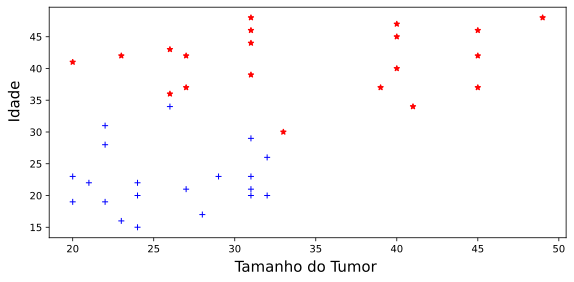

In [179]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(benigno['tamanho_tumor'],benigno['idade'], '+b')
ax.plot(maligno['tamanho_tumor'],maligno['idade'], '*r')
plt.text(30,8,'Tamanho do Tumor', fontdict={'size': 15})
plt.text(16,32,'Idade', fontdict={'size': 15}, rotation=90)
plt.tight_layout()

## Hipotese de regressão logística

$$ h_\theta(x) = g(\theta^T x)$$

onde a função $g$ é uma função sigmoidal dada por: 

$$g(z) = \frac{1}{1+e^{-z}}$$.

## Criando um modelo

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
3# Separando o conjunto de dados
X = df[['tamanho_tumor', 'idade']]
y = df['y']

In [182]:
# Instanciando o modelo de regressão logística
model = LogisticRegression()

## Treinamento do modelo

In [183]:
# Fit para treinar
model.fit(X,y)

LogisticRegression()

In [184]:
# Verificação de Coeficientes

print(model.coef_)
print(model.intercept_)

[[0.69285334 0.95224814]]
[-50.67707801]


In [185]:
# É necessário separar os dados em treino e teste.
# Aqui foi um exemplo com foco apenas na Regressão Logística.
ỹ = model.predict(X)

## Avaliando os resultados

In [186]:
from sklearn.metrics import classification_report
from sklearn import metrics 

In [187]:
## acurácia
metrics.accuracy_score(y,ỹ)

1.0

In [188]:
## Matriz de confusão
metrics.confusion_matrix(y,ỹ)

array([[20,  0],
       [ 0, 20]], dtype=int64)

In [189]:
## acurácia
metrics.precision_score(y,ỹ)

1.0

In [190]:
## recall
metrics.recall_score(y,ỹ)

1.0

In [191]:
## f1-score
metrics.f1_score(y,ỹ)

1.0

##### Relatório de Classificação

In [192]:
print(classification_report(y,ỹ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# 9.30 - Regressão Logística - Apresentação do Projeto

Neste projeto estaremos trabalhando com um conjunto de dados falso de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda. Vamos tentar criar um modelo que preveja se clicará ou não em um anúncio baseado nos recursos desse usuário.

Este conjunto de dados contém os seguintes recursos:

* **tempo_diario_site**: tempo diário no site em minutos.
* **idade**: idade do consumidor.
* **renda_media_regiao**: Média da renda do consumidor na região.
* **tempo_medio_internet**: Média em minutos por dia que o consumidor está na internet.
* **titulo**: Título do anúncio.
* **cidade**: Cidade do consumidor.
* **sexo**: Se o consumidor era ou não masculino.
* **pais**: País do consumidor.
* **timestamp_clique'**: hora em que o consumidor clicou no anúncio ou janela fechada.
* **clique**: 0 ou 1 indicam se clicou ou não no anúncio.

## Etapas do projeto
- Coleta de dados
- Análise de dados
- Criação de modelos
- Validação de modelos
- Apresentação dos resultados

In [193]:
## Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 9.32 - Projeto - Coleta dos Dados

## 1. Coleta de dados

In [194]:
anuncios = pd.read_csv(r'Módulo 09 - Machine Learning\material_apoio\reg-logistica\advertising.csv')

**Verifique o cabeçalho do ad_data**

In [195]:
anuncios.head()

,tempo_diario_site,idade,renda_media_regiao,tempo_medio_internet,titulo,cidade,sexo,pais,timestamp_clique,clique
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info() e describe() em ad_data**

In [196]:
anuncios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_diario_site     1000 non-null   float64
 1   idade                 1000 non-null   int64  
 2   renda_media_regiao    1000 non-null   float64
 3   tempo_medio_internet  1000 non-null   float64
 4   titulo                1000 non-null   object 
 5   cidade                1000 non-null   object 
 6   sexo                  1000 non-null   int64  
 7   pais                  1000 non-null   object 
 8   timestamp_clique      1000 non-null   object 
 9   clique                1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [197]:
anuncios.describe()

,tempo_diario_site,idade,renda_media_regiao,tempo_medio_internet,sexo,clique
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# 9.33 - Projeto - Análise Exploratória Pandas Profiling

## 2. Análise de dados exploratória

- Vamos usar o Pandas profiling para gerar um relatório dos dados
- Vamos usar o Seaborn para explorar os insights!

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
relatorio = ProfileReport(anuncios, title='Relatório dos Anúncios')
relatorio.to_file('relatorio_dos_anuncios_v1.html')

In [ ]:
relatorio

# 9.34 - Projeto - Análise Exploratória Questionamentos

### Questionamentos 

- Existem dados ausentes? 
    - Não!
- Precisamos representar variáveis de outra forma? 
    - Sim a variável timestamp 
- Existem dados duplicados?
    - Não 
- Existem features compostas?
    - Sim a variável timestamp 
- Podemos integrar mais dados para análise?
    - Não! 
- Quais perguntas eu posso responder com estes dados?
- Como estão os dados? As feature alvo é balanceada?

### Informações
- São 10 variáveis (4 numericas e 6 categoricas: 3 float64, 3 int64 e 4 object)

### Insights

**Transformação de feature composta timestamp_clique**

In [201]:
anuncios['timestamp_clique']

0      2016-03-27 00:53:11
1      2016-04-04 01:39:02
2      2016-03-13 20:35:42
3      2016-01-10 02:31:19
4      2016-06-03 03:36:18
              ...         
995    2016-02-11 21:49:00
996    2016-04-22 02:07:01
997    2016-02-01 17:24:57
998    2016-03-24 02:35:54
999    2016-06-03 21:43:21
Name: timestamp_clique, Length: 1000, dtype: object

In [202]:
anuncios['timestamp_clique'].dtype

dtype('O')

In [203]:
anuncios['timestamp_clique'] = pd.to_datetime(anuncios['timestamp_clique'])

In [204]:
anuncios['ano'] = anuncios['timestamp_clique'].dt.year
anuncios['mes'] = anuncios['timestamp_clique'].dt.month
anuncios['day'] = anuncios['timestamp_clique'].dt.day

In [205]:
anuncios.head()

,tempo_diario_site,idade,renda_media_regiao,tempo_medio_internet,titulo,cidade,sexo,pais,timestamp_clique,clique,ano,mes,day
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016,3,27
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016,4,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016,3,13
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016,1,10
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016,6,3


# 9.35 - Projeto - Análise Exploratória Respondendo Questionamentos

###### Qual a idade padrão dos consumidores? 

Text(0.5, 0, 'idade')

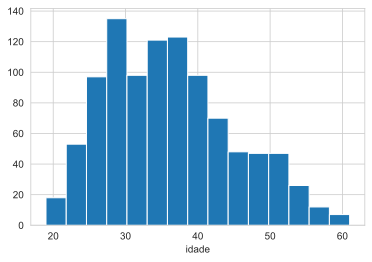

In [206]:
sns.set_style('whitegrid')
anuncios['idade'].hist(bins=15)
plt.xlabel('idade')

- Uma grande parte dos consumidores possuem idade entre 25 e 45 anos

In [207]:
anuncios.head()

,tempo_diario_site,idade,renda_media_regiao,tempo_medio_internet,titulo,cidade,sexo,pais,timestamp_clique,clique,ano,mes,day
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016,3,27
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016,4,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016,3,13
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016,1,10
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016,6,3


###### Consumidores mais velhos possuem renda média da região maiores do que os mais novos?

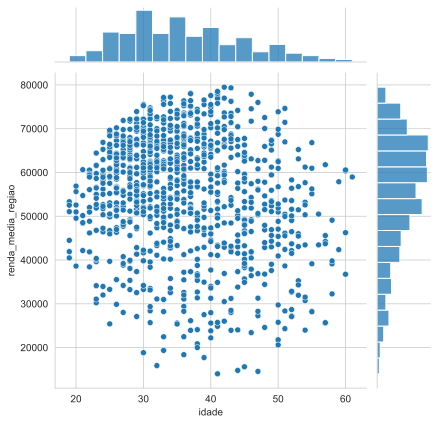

In [208]:
sns.jointplot(x='idade', y='renda_media_regiao',data=anuncios)

- Não existe uma linearidade muito forte entre as variáveis
- A renda não é tão dependente da idade

######  Pessoas mais novas gastam mais tempo no site do que pessoas mais velhas??

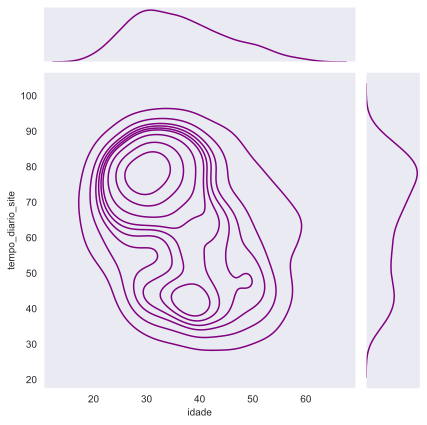

In [209]:
##use KDE
sns.set_style('dark')
sns.jointplot(x='idade',y='tempo_diario_site',data=anuncios, kind='kde', color='purple');

- Existe uma concentração de pontos na parte superior do gráfico mais a esquerda
- Com o KDE conseguimos exerga que as pessoas que gastam mais tempo no site
- A concentração de consumidores com idades entre 20 e 40 anos e tempo médio diário de 70 a 80 possuem uma maior concentração 

In [210]:
anuncios

,tempo_diario_site,idade,renda_media_regiao,tempo_medio_internet,titulo,cidade,sexo,pais,timestamp_clique,clique,ano,mes,day
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016,3,27
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016,4,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016,3,13
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016,1,10
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,2016,2,11
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,2016,4,22
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,2016,2,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,2016,3,24


###### Quem usa mais a internet gasta mais?

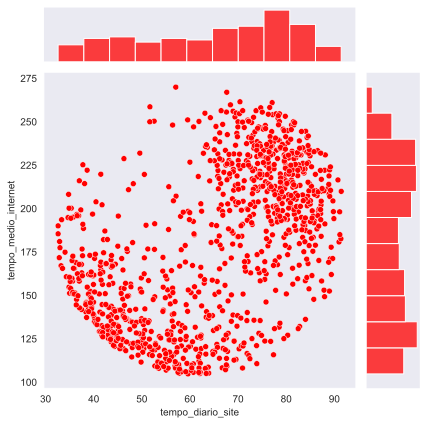

In [211]:
sns.jointplot(x='tempo_diario_site',y='tempo_medio_internet',data=anuncios, color='red');

- pessoas que ficam mais tempo no site constumam ficar mais tempo em outros sites da internet
- pessoas que ficam poouco tempo no site tendem a ficar menos tempo também em sites na internet

######  Quem são os consumidores que clicaram mais no site??

In [ ]:
sns.pairplot(anuncios,hue='clique')

- Os dados se separam de alguma forma com as variáveis

# 9.36 - Projeto - Implementando Regressão Logística

## Regressão Logística

Agora é hora de quebrar nossos dados em treino e teste e fitar nosso modelo.

Você terá a liberdade aqui para escolher colunas em que deseja treinar!

**Divida os dados em conjunto de treinamento e conjunto de testes usando train_test_split**

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
anuncios.columns

Index(['tempo_diario_site', 'idade', 'renda_media_regiao',
       'tempo_medio_internet', 'titulo', 'cidade', 'sexo', 'pais',
       'timestamp_clique', 'clique', 'ano', 'mes', 'day'],
      dtype='object')

In [215]:
X = anuncios[['tempo_diario_site', 'idade', 'tempo_medio_internet']] 
y = anuncios['clique']

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Treine e ajuste um modelo de regressão logística no conjunto de treinamento.**

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [218]:
logmodel = LogisticRegression()

In [219]:
logmodel.fit(X_train,y_train)

LogisticRegression()

## Previsões e avaliações
**Agora preveja valores para os dados de teste.**

In [220]:
ỹ_test = logmodel.predict(X_test)

**Crie um relatório de classificação para o modelo.**

In [221]:
accuracy_score(y_test, ỹ_test)

0.9454545454545454

In [222]:
print(classification_report(y_test,ỹ_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       162
           1       0.96      0.93      0.95       168

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



## Acurácia de acordo com a entrada
- tempo_diario_site, idade, renda_media_regiao, tempo_medio_internet, sexo  -> **90.60%**
- tempo_diario_site, idade, renda_media_regiao, tempo_medio_internet, sexo, mês -> **90,00%**
- tempo_diario_site, idade, renda_media_regiao, tempo_medio_internet, sexo, mês, dia -> **90,30%**
- idade, renda_media_regiao, tempo_medio_internet, sexo, mes, day -> **86,96%**
- tempo_diario_site, renda_media_regiao, tempo_medio_internet, sexo, mês, dia -> **66,06%**
- tempo_diario_site, idade, tempo_medio_internet, sexo  -> **94.54%**
- tempo_diario_site, idade, renda_media_regiao, sexo  -> **90.60%**
- tempo_diario_site, idade, renda_media_regiao,tempo_medio_internet -> **90.60%**
- tempo_diario_site, idade, tempo_medio_internet -> **94,54%**

### Conclusões
- O modelo atingiu bons resultados considerando 90.60% de acurácia usando 5 variáveis.
- O mês e dia não ajudou a separar o modelo, talvez a quantidade de dados seja insuficiente para considerar o tempo.
- O tempo diario no site, a idade e o tempo médio de internet são os atributos mais importantes para o clique.
- Poderiamos melhorar o resultado integrando mais dados ou fazendo engenharia de features.